# Observations and Insights

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from pprint import pprint

%matplotlib notebook

In [17]:
# Creating data path for datasets
job_data_path="Marks-Code\job_company_merged_data.csv"

# Reading datasets
job_data = pd.read_csv(job_data_path)
job_data

,Unnamed: 0,job id,job level,location,job name,post date,landing page,category,company id,company name,content,contents,industy 1,industy 2,industy 3,industy 4,industy 5,industy 6
0,0,3092962,Mid Level,"New York, NY",Rate Table Analyst,2020-06-13T23:41:21.301065Z,https://www.themuse.com/jobs/better/rate-table...,Data Science,1086,Better,NaN,<p><strong>About Better.com:</strong><br> <br>...,Consumer,Finance,Real Estate & Construction,Tech,NaN,NaN
1,1,2722893,Mid Level,"Boston, MA","Data Scientist, Acorn AI Labs",2020-06-10T23:05:28.051056Z,https://www.themuse.com/jobs/medidata/data-sci...,Data Science,1309,Medidata,NaN,<p>Medidata: Conquering Diseases Together</p>\...,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3104296,Mid Level,"Atlanta, GA",Advanced Analytics Specialist 2,2020-06-12T22:39:39.785871Z,https://www.themuse.com/jobs/walmart/advanced-...,Data Science,12010,Walmart,NaN,<p><strong> Position Summary... </strong><br><...,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2686925,Mid Level,"Seattle, WA","AI/ML - Machine Learning Educator, Machine Int...",2020-05-19T11:13:51.307171Z,https://www.themuse.com/jobs/apple/aiml-machin...,Data Science,11802,Apple,NaN,"<p>Summary <br><br> Posted: May 18, 2020 <br><...",NaN,NaN,NaN,NaN,NaN,NaN
4,4,3119346,Mid Level,"Atlanta, GA",Advanced Analytics Specialist 2,2020-06-12T23:35:19.533738Z,https://www.themuse.com/jobs/walmart/advanced-...,Data Science,12010,Walmart,NaN,<p><strong> Position Summary... </strong><br><...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,584,2454783,Senior Level,"New York, NY","Data Engineer, Enterprise Analytics",2020-05-03T12:05:22.252934Z,https://www.themuse.com/jobs/healthfirst/data-...,Data Science,11711,Healthfirst,NaN,<p>The Data Engineer on the Enterprise Analyti...,Healthcare,Insurance,NaN,NaN,NaN,NaN
585,585,2617689,Mid Level,"New York, NY",Healthfirst Analyst,2020-05-03T12:05:22.244693Z,https://www.themuse.com/jobs/healthfirst/healt...,Data Science,11711,Healthfirst,NaN,<p>Job Description Summary<br>The Healthcare A...,Healthcare,Insurance,NaN,NaN,NaN,NaN
586,586,2607112,Senior Level,Flexible / Remote,"Bioinformatics Engineer, Algorithm",2020-04-30T23:02:35.384368Z,https://www.themuse.com/jobs/invitae/bioinform...,Data Science,11945,Invitae,NaN,<p> </p>\r\n\r\n<h4><span>Invitae is a healthc...,NaN,NaN,NaN,NaN,NaN,NaN
587,587,2523926,Mid Level,"Washington, DC",SAS Developer,2020-05-06T23:41:09.576843Z,https://www.themuse.com/jobs/baesystems/sas-de...,Data Science,940,BAE Systems,NaN,<p><b>Job Description </b><br> This BAE System...,Engineering,Tech,NaN,NaN,NaN,NaN


In [18]:
#new column
job_data["job title category"]=""
job_data.columns

Index(['Unnamed: 0', 'job id', 'job level', 'location', 'job name',
       'post date', 'landing page', 'category', 'company id', 'company name',
       'content', 'contents', 'industy 1', 'industy 2', 'industy 3',
       'industy 4', 'industy 5', 'industy 6', 'job title category'],
      dtype='object')

In [19]:
#finding unique number of jobs in the dataset
job_count= job_data["job name"].value_counts()
job_count

Data Engineer                                                      11
Senior Data Scientist                                               8
Data Scientist                                                      7
Data Analyst                                                        6
Bioinformatics Engineer, Algorithm                                  5
                                                                   ..
Machine Learning Research Engineer                                  1
Privacy Program Specialist                                          1
Director, Sales Insights & Strategy                                 1
Research Project Manager, Breast Service, Department of Surgery     1
Data Engineer, Digital and Computational Pathology                  1
Name: job name, Length: 509, dtype: int64

In [20]:
job_data.loc[job_data["job name"].isna()]

,Unnamed: 0,job id,job level,location,job name,post date,landing page,category,company id,company name,content,contents,industy 1,industy 2,industy 3,industy 4,industy 5,industy 6,job title category


In [21]:
#dictionary

job_title = {}
job_title["Data Scientist"]=0
job_title["Data Engineer"]=0
job_title["Data Analyst"]=0
job_title["Managerial"]=0
job_title["Quantitive/Research"]=0
job_title["Other"]=0

data_scientist_list=["scientist","data science","science"]
data_engineer_list=["engineer","data engineer"]
data_analyst_list=["analyst","data analyst","business intelligence","analytics","analytic"]
managerial_data_list=["director","manager","vice president","head of","lead"]
quant_list=["quant","research"]

for job in job_data["job name"].tolist():
    job=job.replace("," ,"")
    job=job.replace(")" ,"")
    job=job.replace("(" ,"")
    job=job.replace("-" ,"")
    job_word=job.lower().split(" ")
    other_exists=True
    for word in job_word:
        if word in data_scientist_list:
            job_title["Data Scientist"]+=1
            other_exists=False
            break
        elif word in data_engineer_list:
            job_title["Data Engineer"]+=1
            other_exists=False
            break
        elif word in data_analyst_list:
            job_title["Data Analyst"]+=1
            other_exists=False
            break
        elif word in managerial_data_list:
            job_title["Managerial"]+=1
            other_exists=False
            break
        elif word in quant_list:
            job_title["Quantitive/Research"]+=1
            other_exists=False
            break
    if other_exists:
        job_title["Other"]+=1
print(job_title)

{'Data Scientist': 65, 'Data Engineer': 123, 'Data Analyst': 137, 'Managerial': 106, 'Quantitive/Research': 33, 'Other': 125}


In [22]:
job_data_df = pd.DataFrame({"count" : job_title})
job_data_df.index

Index(['Data Analyst', 'Data Engineer', 'Data Scientist', 'Managerial',
       'Other', 'Quantitive/Research'],
      dtype='object')

In [23]:
job_data_df

,count
Data Analyst,137
Data Engineer,123
Data Scientist,65
Managerial,106
Other,125
Quantitive/Research,33


<IPython.core.display.Javascript object>


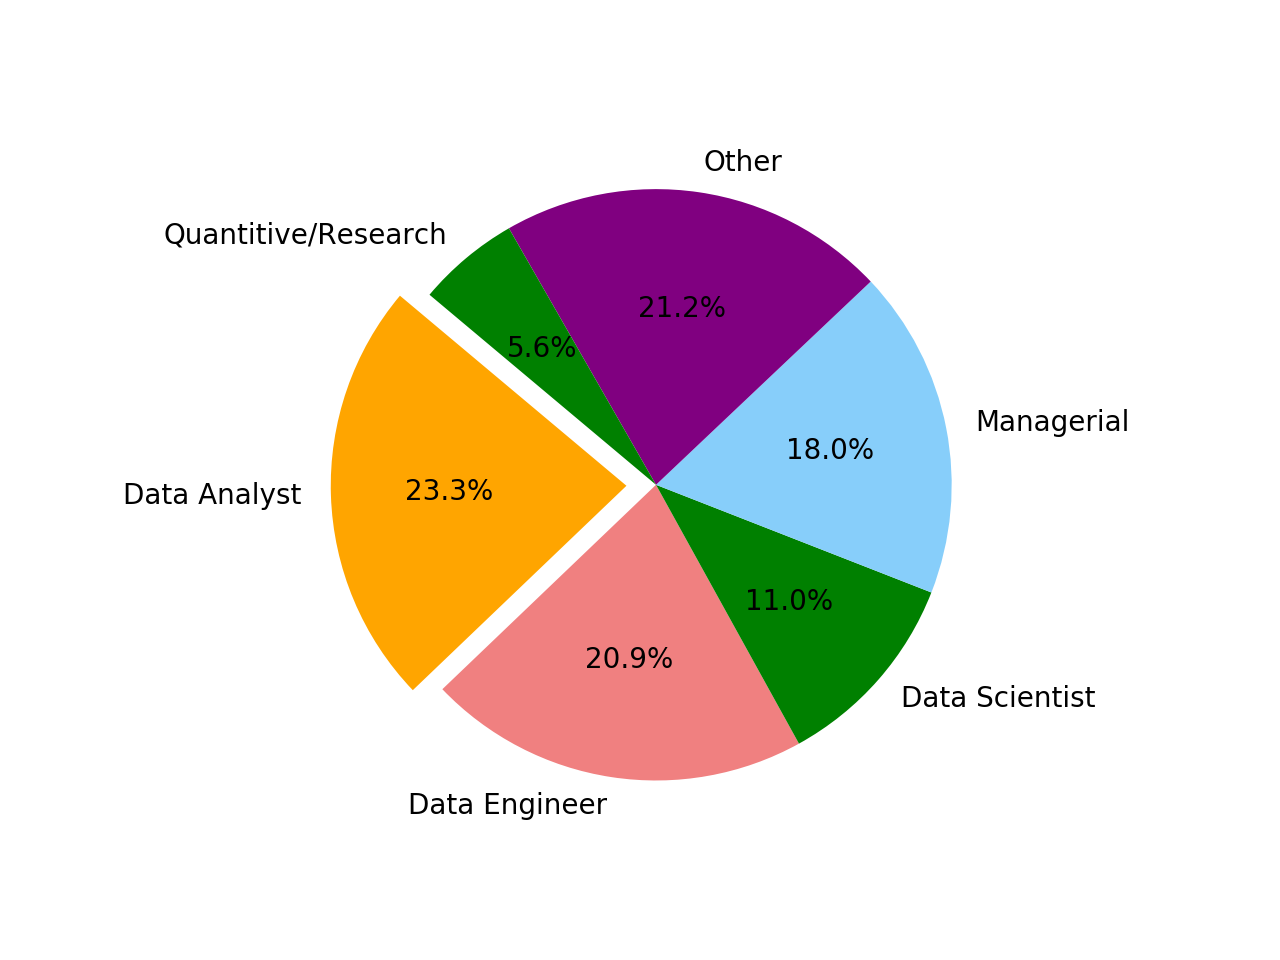

In [24]:
# Labels for the sections of our pie chart
labels = job_data_df.index.values

# The values of each section of the pie chart
sizes = job_data_df["count"]

# The colors of each section of the pie chart
colors = ["orange", "lightcoral", "green", "lightskyblue","purple","green"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0, 0, 0,0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)

plt.show()